> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Soccer Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This soccer database comes from Kaggle and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.
What we get:

+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches


### Question(s) for Analysis
after having a look at the dataset files i came out with these questions

#### Q1 (Which are the most successful attacking teams when they play at home?)
#### Q2 (Which teams are the most conceding away goals through the given data period?)
#### Q3 (What is the common heights and weights of soccer players and do they have anything to do with players performance?)

now i have to have a better look at the data to determine what to drop, merge and create
to get the needed data to awnser these questions
#### so let's go

In [98]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [99]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas


Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling



### General Properties
every table in the dataset with its	total rows and total columns

/Country	(11,	2)

/League	(11,	3)

/Match	(25979,	115)

/Player	(11060, 	7)

/Player_Attributes	(183978,	42)

/Team	(299,	5)

/Team_Attributes	(1458,	25)



here i load my data files and have a good look to know what to do after


In [100]:

country = pd.read_csv('Country.csv')
league = pd.read_csv('League.csv')
match = pd.read_csv('Match.csv')
player = pd.read_csv('Player.csv')
player_attributes = pd.read_csv('Player_Attributes.csv')
sqlite_sequence = pd.read_csv('sqlite_sequence.csv')
team = pd.read_csv('Team.csv')
team_attributes = pd.read_csv('Team_Attributes.csv')


In [101]:
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [102]:
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [103]:
match.tail()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,42231.0,678384.0,95220.0,638592.0,413155.0,45780.0,171229.0,67333.0,119839.0,143790.0,195215.0,462944.0,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,2,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,9.0,11.0,11.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,33272.0,41621.0,25813.0,257845.0,114735.0,42237.0,113227.0,358156.0,32343.0,531309.0,37257.0,42276.0,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,157856.0,274779.0,177689.0,294256.0,42258.0,39979.0,173936.0,147959.0,451983.0,80564.0,289472.0,10637.0,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,7.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,NaN,8881.0,173534.0,39646.0,282287.0,340790.0,393337.0,8893.0,614454.0,93229.0,178142.0,274776.0,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25978,25979,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992095,10192,9931,4,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,274787.0,492132.0,108451.0,25815.0,94553.0,384376.0,598355.0,36

In [104]:
player.tail()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172
11059,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176


In [105]:
player_attributes.tail()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0
183977,183978,102359,39902,2007-02-22 00:00:00,80.0,81.0,right,medium,low,74.0,68.0,57.0,88.0,77.0,87.0,86.0,53.0,78.0,91.0,58.0,64.0,77.0,66.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,38.0,32.0,30.0,9.0,9.0,78.0,7.0,15.0


In [106]:
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [107]:
team_attributes.tail()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1457,1458,15005,10000,2015-09-10 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


I have had a good look on the data tables, now i'll start cleaning it


### Data Cleaning

 

#### first search for nulls and duplicated then merging ,dropping and renaming for every question needs

In [108]:
match.duplicated().value_counts()

False    25979
dtype: int64

In [109]:
match1 = match.iloc[:,:11]

In [110]:
match1.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [111]:
match1.isnull().value_counts()


id     country_id  league_id  season  stage  date   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  away_team_goal
False  False       False      False   False  False  False         False             False             False           False             25979
dtype: int64

#### got the final clean part of match dataframe that i need to answer my questions

In [112]:
team1 = team.iloc[:,[1,3]]

In [113]:
match_team = match1.merge(team1,left_on='home_team_api_id',right_on='team_api_id',how ='inner')
match_team.rename(columns ={'team_long_name':'home_team_name'},inplace=True)
match_team.drop(columns = 'team_api_id',inplace=True)
match_team.tail(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_team_name
25977,25965,24558,24558,2015/2016,7,2015-08-29 00:00:00,1992081,7896,10199,0,1,Lugano
25978,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,0,Lugano


#### merging dataframes ,renaming columns and droping non needed ones to awnser the questions

In [114]:
match_team1 = match_team.merge(team1,left_on='away_team_api_id',right_on='team_api_id',how ='inner')
match_team1.rename(columns ={'team_long_name':'away_team_name'},inplace=True)
match_team1.drop(columns = ['team_api_id','home_team_api_id','away_team_api_id','match_api_id'],inplace=True)
match_team1.tail(2)


,id,country_id,league_id,season,stage,date,home_team_goal,away_team_goal,home_team_name,away_team_name
25977,25845,24558,24558,2015/2016,18,2015-12-06 00:00:00,4,1,Lugano,Grasshopper Club Zürich
25978,25925,24558,24558,2015/2016,32,2016-05-08 00:00:00,0,1,Lugano,Grasshopper Club Zürich


#### after droping ,appending ,renaming & reordering columns finally got dataframe of all matches results with plain team names

In [115]:
col_names = ['id','country_id','league_id','season','stage','date','home_team_name','home_team_goal','away_team_name','away_team_goal']
match_team1.reindex(columns = col_names)


,id,country_id,league_id,season,stage,date,home_team_name,home_team_goal,away_team_name,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,KRC Genk,1,Beerschot AC,1
1,483,1,1,2009/2010,5,2009-08-30 00:00:00,KRC Genk,1,Beerschot AC,1
2,524,1,1,2010/2011,1,2010-08-01 00:00:00,KRC Genk,2,Beerschot AC,1
3,759,1,1,2011/2012,1,2011-07-30 00:00:00,KRC Genk,3,Beerschot AC,1
4,1014,1,1,2012/2013,11,2012-10-20 00:00:00,KRC Genk,3,Beerschot AC,0
...,...,...,...,...,...,...,...,...,...,...
25974,25430,24558,24558,2012/2013,8,2012-09-01 00:00:00,FC Lausanne-Sports,0,Grasshopper Club Zürich,2
25975,25549,24558,24558,2013/2014,29,2014-04-12 00:00:00,FC Lausanne-Sports,0,Grasshopper Club Zürich,2
25976,25591,24558,24558,2013/2014,4,2013-08-03 00:00:00,FC Lausanne-Sports,0,Grasshopper Club Zürich,0
25977,25845,24558,24558,2015/2016,18,2015-12-06 00:00:00,Lugano,4,Grasshopper Club Zürich,1


#### starting to clean data for the third question : Does height matters in being better player?


In [116]:
player_attributes.duplicated().value_counts()

False    183978
dtype: int64

In [117]:
players1 = player_attributes.merge(player, left_on='player_api_id',right_on='player_api_id',how='inner')
players1.head(1)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


#### merging dataframes to get heights and weights of players with their performance rate

In [118]:
players1.drop(columns =['id_x','date','attacking_work_rate','defensive_work_rate','birthday','player_fifa_api_id_x','player_fifa_api_id_y'], inplace=True)
players1.head(1)

,player_api_id,overall_rating,potential,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,height,weight
0,505942,67.0,71.0,right,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,182.88,187


In [119]:
players3 = players1.groupby(['player_name','player_api_id']).mean()
players3.head(1)

,,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,height,weight
player_name,player_api_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Appindangoye,505942,63.6,67.6,48.6,43.6,70.6,60.6,43.6,50.6,44.6,38.6,63.6,48.6,60.0,64.0,59.0,46.6,65.0,54.6,58.0,54.0,76.0,34.6,65.8,52.2,44.6,53.6,47.6,63.8,66.0,67.8,5.6,10.6,9.6,7.6,7.6,1,182.88,187


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which are the most successful attacking teams when they play at home?)

#### got total home goals for every team >> droped teams that played less than half of max number of player matches >> got
#### the number of games played >> divided goals by games to get the scoring rate >> got the top 10

In [120]:
home_goals = match_team1.groupby('home_team_name')['home_team_goal'].sum()
home_goals

home_team_name
1. FC Kaiserslautern         37
1. FC Köln                  116
1. FC Nürnberg              108
1. FSV Mainz 05             171
AC Ajaccio                   64
                           ... 
Xerez Club Deportivo         20
Zagłębie Lubin              116
Zawisza Bydgoszcz            43
Évian Thonon Gaillard FC    105
Śląsk Wrocław               176
Name: home_team_goal, Length: 296, dtype: int64

#### got total home goals for every team

In [121]:
#iam dropping the teams that have played less than half of the max played matches number to have 
#more real view from this analysis
matches_number = match_team1.home_team_name.value_counts()
matches_number = matches_number[matches_number.values > 75]
matches_number

Liverpool                  152
Stade Rennais FC           152
Athletic Club de Bilbao    152
Chievo Verona              152
Getafe CF                  152
                          ... 
Southampton                 76
RC Celta de Vigo            76
Rangers                     76
Racing Santander            76
Real Valladolid             76
Name: home_team_name, Length: 177, dtype: int64

#### got the number of games played , droped teams that played less than half of max number of player matches

In [122]:
scoring_rate = (home_goals/matches_number).dropna()
scoring_rate = scoring_rate.sort_values(ascending=False)
top_10_rates = scoring_rate[:10]
top_10 =top_10_rates.to_frame()
top_10.columns = ['Club Home Scoring Rate']
top_10
#dividing total home goals by number of played matches 
#to get the goals per game rate for each team

,Club Home Scoring Rate
Real Madrid CF,3.322368
FC Barcelona,3.256579
FC Bayern Munich,2.808824
PSV,2.720588
Ajax,2.647059
SL Benfica,2.588710
Celtic,2.559211
FC Basel,2.405594
Manchester City,2.401316
FC Porto,2.379032


#### divided goals by games to get the scoring rate and got the top 10  home scoring teams

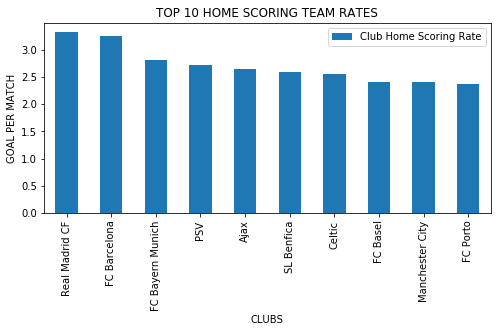

In [123]:
#top_10.plot(kind='bar' , title  = 'top 10 home scoring team rates'.title(),figsize =(12,6));
def plot1():
    fig1 = top_10.plot(kind='bar' ,figsize =(8,3.5));
    fig1.set_xlabel('Clubs'.upper());
    fig1.set_ylabel('Goal per match'.upper());
    fig1.set_title('top 10 home scoring team rates'.upper());
plot1()    

#### finally got a bar chart of the top home scoring teams with their scoring rate
#### and the top two clubs are spanish (real madrid and barcelona)

### Research Question 2  (Which teams are the most conceding away goals through the given data period?)

#### got total home goals for every away team >> droped teams that played less than half of max number of player matches >> got  the number of games played >> divided goals by games to get the scoring rate >> got the top 10

In [124]:
#calc total away conceded goals for each team through the given data period
away_conceded_goals = match_team1.groupby('away_team_name')['home_team_goal'].sum()
away_conceded_goals

away_team_name
1. FC Kaiserslautern         58
1. FC Köln                  172
1. FC Nürnberg              151
1. FSV Mainz 05             190
AC Ajaccio                  107
                           ... 
Xerez Club Deportivo         37
Zagłębie Lubin              124
Zawisza Bydgoszcz            51
Évian Thonon Gaillard FC    118
Śląsk Wrocław               180
Name: home_team_goal, Length: 296, dtype: int64

#### got total home goals for every away team

In [125]:
#iam dropping the teams that have played less than half of the max played matches number to have 
#more real view from this analysis
matches_number1 = match_team1.home_team_name.value_counts()
matches_number1 = matches_number1[matches_number1.values > 75]
matches_number1

Liverpool                  152
Stade Rennais FC           152
Athletic Club de Bilbao    152
Chievo Verona              152
Getafe CF                  152
                          ... 
Southampton                 76
RC Celta de Vigo            76
Rangers                     76
Racing Santander            76
Real Valladolid             76
Name: home_team_name, Length: 177, dtype: int64

#### got the number of games played, droped teams that played less than half of max number of player matches

In [126]:
conceded_rate = (away_conceded_goals/matches_number1).dropna()
conceded_rate = conceded_rate.sort_values(ascending=False)
top_10_conceding_rates = conceded_rate[:10]
top_10_conceding =top_10_conceding_rates.to_frame()
top_10_conceding.columns = ['Club Away Conceding Rate']
top_10_conceding
#dividing total away goals by number of played matches 
#to get the conceded goals per game rate for each team

,Club Away Conceding Rate
Rayo Vallecano,2.252632
Roda JC Kerkrade,2.218487
Blackburn Rovers,2.131579
Willem II,2.088235
Norwich City,2.039474
Heracles Almelo,2.000000
Hannover 96,1.985294
Granada CF,1.978947
NAC Breda,1.974790
ADO Den Haag,1.970588


#### divided goals by games to get the scoring rate then got the top 10 conceding rate

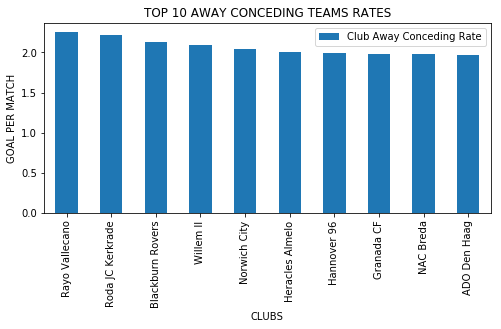

In [127]:
#top_10_conceding.plot(kind='bar' , title  = 'top 10 away conceding team rates'.title(),figsize =(12,6));
def plot2():
    fig2 = top_10_conceding.plot(kind='bar' ,figsize =(8,3.5));
    fig2.set_xlabel('Clubs'.upper());
    fig2.set_ylabel('Goal per match'.upper());
    fig2.set_title('top 10 away conceding teams rates'.upper());
plot2()    

#### finally this is a bar chart of the highest conceding teams with their conceding rate
#### and looks like the list have 2 spanish clubs which indicate that la liga matches have the highest goals on average compared to other leagues

### Research Question 3  (What is the common heights and weights of soccer players and do they have anything to do with players performance?)

#### plot scatter beween heights and rates

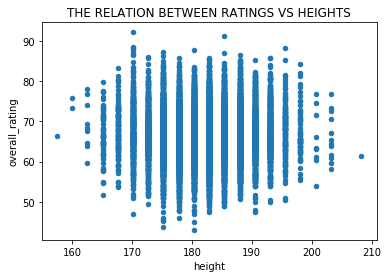

In [128]:
def plot5():
    players3.plot.scatter(x='height',y='overall_rating' ,title='the relation between ratings vs heights'.upper());
plot5()    

#### players' height distribution

#### looks like most common height rane for players from 178 to 188 cm

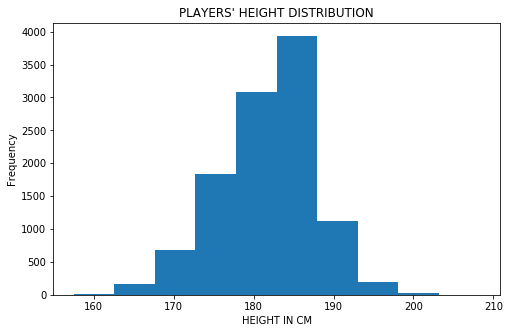

In [129]:
def plot3():
    fig3 =players3.height.plot(kind='hist',title ="players' height distribution".upper(),figsize=(8,5));
    fig3.set_xlabel('Height in cm'.upper());
plot3()

#### players' weight distribution

#### looks like the most common weight range from 156 to 180 ib

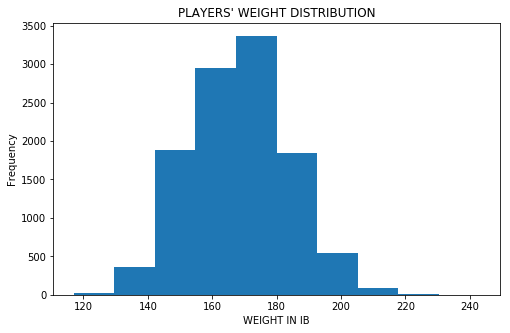

In [130]:
def plot4():
    fig4 =players3.weight.plot(kind='hist',title ="players' weight distribution".upper(),figsize=(8,5));
    fig4.set_xlabel('weight in ib'.upper());
plot4()    

#### plot scatter beween weights and rates

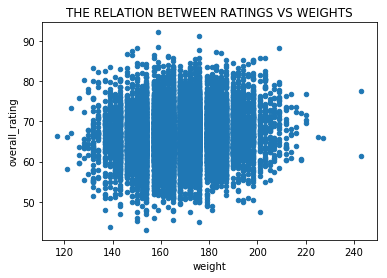

In [131]:
def plot6():
    players3.plot.scatter(x='weight',y='overall_rating' ,title='the relation between ratings vs weights'.upper() );
plot6()    

<a id='conclusions'></a>
## Conclusions


### Q1  Which are the most successful attacking teams when they play at home?
after having good look in data i had a conclusion that the best indecator to attacking is the goals
so after some data minipulation i got the highest 10 scoring rates at home 

#### the top home scoring teams are 

#### Real Madrid CF	
#### FC Barcelona	
#### FC Bayern Munich	
#### PSV	
#### Ajax	
#### SL Benfica	
#### Celtic	
#### FC Basel	
#### Manchester City	
#### FC Porto	

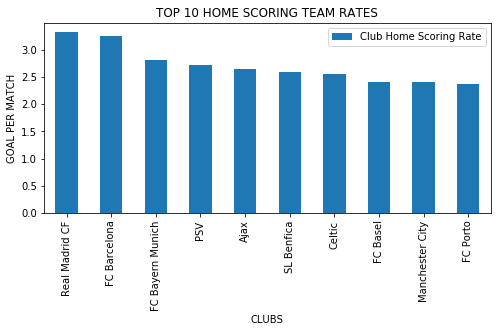

In [132]:
#top_10.plot(kind='bar' , title  = 'top 10 home scoring team rates'.title(),figsize =(12,6));
plot1()


#### bar chart of the top home scoring teams with their scoring rate
#### and the top two clubs are spanish (real madrid and barcelona) 
#### looks like la liga have the most attacking games compared to rest of leagues

### Q2 Which teams are the most conceding away goals through the given data period?
#### after some data minipulation i got the most 10 away goals conceding teams
#### Rayo Vallecano	
#### Roda JC Kerkrade	
#### Blackburn Rovers	
#### Willem II	
#### Norwich City	
#### Heracles Almelo	
#### Hannover 96	
#### Granada CF	
#### NAC Breda	
#### ADO Den Haag	

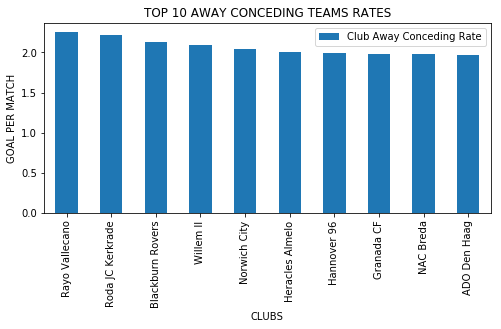

In [133]:
#top_10_conceding.plot(kind='bar' , title  = 'top 10 away conceding team rates'.title(),figsize =(12,6));
plot2()    

####  bar chart of the highest conceding teams with their conceding rate
#### and looks like the list have 2 spanish clubs which affirm that la liga teams tend to play attacking games not defencive compared to other leagues

### Q3  What is the common heights and weights of soccer players and do they have anything to do with players performance?

##### after data minipulation, scatter and bar plotings i concluded that



#### >>>the most common height rane for players from 178 to 188 cm

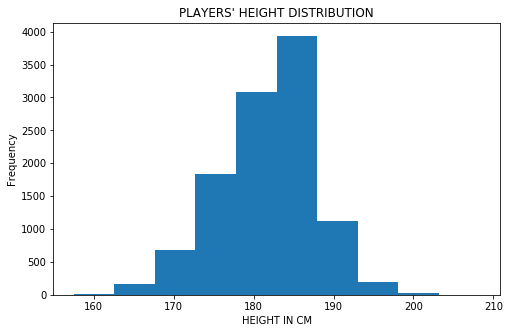

In [136]:
plot3()

#### >>>the most common weight range from 156 to 180 ib

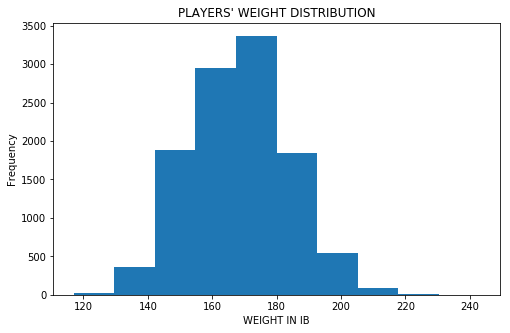

In [137]:
plot4()

#### >>> from the scatters and the 2 histograms above, sounds like weight and height doesn't have that much of effect on performance rate as the overs and unders are fewer but still nearly have the same average rate but the exceptional players are closer to the common ranges and that's because most of players are in or close to these ranges then the probability of exceptional players weights and heights would be alot more in these ranges

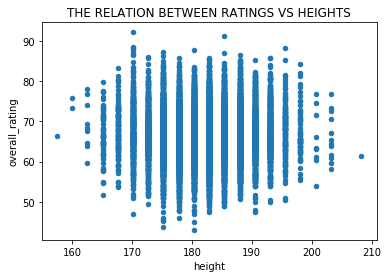

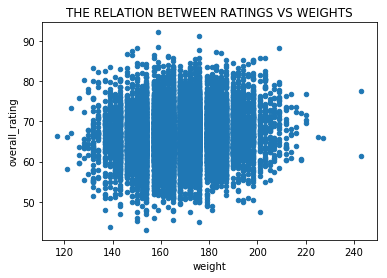

In [138]:
plot5()
plot6()

## Limitation

#### the first and second questions
#### Q1 Which are the most successful attacking teams when they play at home?
#### Q2 Which teams are the most conceding away goals through the given data period?
#### could've been more percise if all the teams matches was covered equally
#### beacuase few teams matches was whole covered and the most of them their was missing matches as the number of games played by each team in the dataset was so far from being equal as their was teams played 152 home games while others have 37 ,42,20 ....
#### and i tried to cover this limitation up by droping the teams which player less than half of the max number to have as far as we can percise results to awnser the questions

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])